In [12]:
import tweepy
consumer_key = 'Yjab88aGQENfS8iOEkuWl2ib9'
consumer_secret = 'LWjZhWE58Lcv048GEfwJHSp5sxzXJzfirc7YNblMrlDDf25vv4'
access_token = '383323140-GsuErAojAYG5FnbSfJ6OV2Ts0Z5VYUju06Ca474Z'
access_secret = 'VfsaYnW8mgmrwDEbKGkZ7f6OyUW1XtU4FjKIdTcDSg2QE'
#Pass our consumer key and consumer secret to Tweepy's user authentication handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

#Pass our access token and access secret to Tweepy's user authentication handler
auth.set_access_token(access_token, access_secret)

#Creating a twitter API wrapper using tweepy
api = tweepy.API(auth)

#Error handling
if (not api):
    print ("Problem connecting to API")

#Getting Geo ID for USA
places = api.geo_search(query="Syria", granularity="country")

#Copy USA id
place_id = places[0].id
print('Syria id is: ',place_id)



Syria id is:  f773199c979358a5


In [29]:
tweets = list()

In [51]:
#Switching to application authentication
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

#Setting up new api wrapper, using authentication only
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
 
#Error handling
if (not api):
    print ("Problem Connecting to API")
    
#You can check how many queries you have left using rate_limit_status() method
api.rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 450, 'remaining': 20, 'reset': 1543522475}}

In [50]:
#This is what we are searching for
#We can restrict the location of tweets using place:id 
#We can search for multiple phrases using OR
most_common_politics = ['presid', 'minist', 'elect', 'prime', 'govern', 'leader', 'obama', 'trump', 'nation', 'state', 'parti', 'barack', 'polit', 'talk', 'presidenti', 'donald', 'vote', 'opposit', 'pm', 'offici', 'deal', 'polic', 'power', 'poll', 'parliament', 'rule', 'support', 'face', 'republican', 'warn', 'gener', 'peac', 'accus', 'claim', 'crisi', 'campaign', 'white', 'democrat', 'announc', 'trade', 'putin', 'chief', 'aid', 'candid', 'urg', 'win', 'resign', 'ban', 'death', 'senat', 'mugab', 'sign', 'summit', 'clinton', 'protest', 'investig', 'terror', 'diplomat', 'lead', 'independ', 'corrupt', 'mp', 'washington', 'secretari',  'victori', 'fire', 'kill', 'decis', 'polici', 'vladimir', 'democraci', 'sanction', 'result', 'politician',  'threat', 'debat', 'controversi', 'cabinet', 'govt', 'speech', 'agreement', 'affair', 'term', 'declar', 'congress', 'rival', 'council', 'activist', 'reform', 'voter', 'ralli', 'address', 'ambassador', 'relat', 'conserv', 'tie', 'parliamentari', 'coalit', 'appeal', 'negoti', 'condemn',  'propos', 'governor', 'referendum',  'accord', 'conflict', 'leadership', 'justic',  'king', 'deputi', 'inquiri','riot', 'alli', 'cooper', 'movement', 'spark', 'forum', 'embassi', 'nato', 'repres', 'prosecutor', 'republ', 'elector', 'unrest','deport', 'spokesman',  'regim', 'mayor', 'attorney', 'nomine', 'demonstr', 'kim',  'communist', 'ministri', 'treati', 'counterpart', 'statement', 'commission', 'brexit', 'eurozon', 'assembl', 'royal', 'merkel', 'dictat', 'queen', 'kremlin', 'gaza', 'pope', 'peacekeep', 'chairman', 'princ', 'revolut', 'kingdom', 'pentagon','freedom','expression','anti', 'offic', 'resist','deploy','crackdown','econom','legisl','negoci','renogoci','march','right','left','wing','censor','censorship','author']
most_common_climate = ['earthquak', 'flood', 'hurrican', 'storm', 'quak', 'kill', 'tsunami', 'damag', 'tornado', 'wildfir', 'disast', 'typhoon', 'devast', 'evacu', 'volcano', 'death', 'warn', 'aid', 'dead', 'magnitud', 'weather', 'help', 'survivor', 'crisi', 'climat', 'govern', 'erupt', 'forc', 'fear', 'threaten',  'victim', 'struck', 'emerg', 'rescu', 'fire', 'risk', 'face', 'unit', 'fukushima', 'deadli',  'radiat', 'cyclon',  'weatherwatch',  'landslid', 'destroy', 'trigger', 'injur', 'flee', 'struggl', 'firefight', 'eyewit',  'die', 'stricken', 'crippl', 'respons', 'threat', 'extrem', 'lava', 'safeti', 'destruct', 'bushfir', 'recoveri', 'impact',  'strike',  'rescuer', 'alert', 'rubbl', 'blaze', 'drought', 'disrupt', 'ravag', 'collaps', 'aftershock', 'aftermath', 'danger', 'avalanch', 'mudslid', 'catastroph', 'landfal', 'heatwav', 'shelter', 'homeless', 'injuri', 'remot', 'volcan',  'buri', 'strand', 'torrenti', 'surviv', 'rip', 'chao', 'concern', 'floodwat', 'explos', 'suffer', 'lost', 'spark', 'ruin', 'debri', 'escap',  'humanitarian',  'safe', 'superstorm', 'panic', 'thunderstorm', 'evacue', 'chernobyl', 'epidem', 'inund', 'flame', 'delug', 'tragedi', 'snowstorm', 'hazard']
most_common_health = ['health', 'drug', 'cancer', 'risk', 'patient', 'diseas', 'ebola', 'food', 'treatment', 'heart', 'viru', 'medic', 'healthcar', 'hospit', 'doctor', 'fda', 'vaccin', 'death', 'flu', 'blood', 'treat', 'drugmak', 'infect', 'medicin', 'diabet', 'pharmaceut', 'zika', 'die', 'clinic', 'breast', 'smoke', 'therapi', 'surgeri', 'organ', 'abort', 'lung', 'aid', 'novarti', 'roch', 'hiv', 'sanofi', 'brain', 'cigarett', 'older', 'drink', 'obes', 'johnson', 'pfizer', 'chang', 'tobacco', 'merck', 'astrazeneca', 'pill', 'medicar', 'ill', 'cell', 'exercis', 'patent', 'epidem', 'opioid', 'hepat', 'surviv', 'cholesterol', 'pharma', 'pregnanc', 'born', 'sleep', 'mental', 'diet', 'eye', 'symptom', 'chronic', 'glaxosmithklin', 'antibiot', 'gene', 'nurs', 'inject', 'head', 'diagnos', 'injuri', 'marijuana', 'biotech', 'suicid', 'medicaid', 'fever', 'skin', 'sexual', 'order', 'prostat', 'syndrom', 'alzheim', 'smoker', 'healthi', 'pregnant', 'respiratori', 'mosquito', 'therapeut', 'fat', 'infant', 'elderli', 'kavanaugh', 'probe', 'pharmaci', 'kidney', 'liver', 'abus', 'sugar', 'cdc', 'alcohol', 'contracept', 'insulin', 'coli', 'addict', 'asthma', 'amgen', 'vitamin', 'bacteria', 'stress', 'arthriti', 'physic', 'dose', 'dengu', 'sclerosi', 'immun', 'gsk', 'allergi', 'allergan', 'immunotherapi', 'malaria', 'mylan', 'swine', 'cure', 'addit', 'tumor', 'sick', 'cholera', 'dementia', 'colon', 'disabl', 'surgeon', 'biosimilar', 'fatal', 'physician', 'superbug', 'leukemia', 'fresh', 'adolesc', 'transplant', 'overweight', 'concuss', 'biogen', 'bone', 'fruit', 'menopaus', 'chemotherapi', 'migrain', 'autism', 'illeg', 'regeneron', 'taint', 'hurt', 'green', 'calori', 'nuclear', 'recov', 'nicotin', 'pathogen', 'steroid', 'hormon', 'pediatrician', 'anxieti', 'salmonella', 'organis', 'habit', 'tuberculosi', 'inhal', 'cardiovascular', 'squibb', 'listeria', 'psoriasi', 'protein', 'dna', 'antidepress', 'avastin', 'diagnosi', 'fertil', 'rheumatoid', 'cv', 'diagnost', 'worsen', 'radiat', 'melanoma', 'statin', 'soda', 'ovarian', 'bowel', 'cardiac', 'knee', 'biotechnolog', 'arteri', 'newborn', 'dead', 'bladder', 'oncolog', 'breath', 'arm', 'adhd', 'healthier', 'olymp', 'cough', 'surgic', 'sugari', 'nutrit', 'polio', 'anthrax', 'poison', 'microcephali']
most_common_war = ['protest', 'kill', 'forc', 'attack', 'polic', 'clash', 'milit', 'soldier', 'militari', 'fighter', 'armi', 'injuri', 'secur', 'arrest', 'airstrik', 'houthi', 'rebel', 'bomb', 'shot', 'strike', 'syrian', 'raid', 'taliban', 'saudi', 'militia', 'fight', 'destroy', 'warplan', 'artilleri', 'gunmen', 'afghan', 'troop', 'violenc', 'burn', 'riot', 'damascu', 'battl', 'grenad', 'weapon', 'gun', 'assault', 'violent', 'rocket', 'missil', 'ambush', 'guard', 'rioter', 'myanmar', 'spla', 'convoy', 'amisom', 'loot', 'pakistan', 'gunfir', 'murder', 'kidnap', 'abduct', 'bjp', 'bombard', 'blast', 'bullet', 'rape', 'fardc', 'destruct', 'patrol', 'shoot', 'tactic', 'bomber', 'mob', 'kia', 'tahrir', 'tortur', 'hurl', 'khairpur', 'defenc', 'withdrew', 'ghazni', 'sadah', 'insurg', 'assassin', 'fought', 'beaten', 'war', 'battalion', 'jamaat', 'hartal', 'peshawar', 'larkana', 'pelt', 'vandal', 'puntland', 'sniper', 'combat', 'quetta', 'islami', 'najran', 'rout', 'farah', 'faryab', 'dalit', 'muhammad', 'afrin', 'awami', 'hostag', 'tnla', 'polici', 'ugandan', 'balaka', 'hudaydah', 'saf', 'terror', 'jaysh', 'chandigarh', 'bab', 'bayda', 'defens', 'fnl', 'herder', 'marib', 'fdlr', 'pistol', 'urozgan', 'ammunit', 'penh', 'aden', 'ngo', 'adf', 'surrend', 'crime', 'nigerian', 'nagar', 'threaten', 'gang', 'freedom', 'conflict', 'kunduz', 'haryana', 'balochistan', 'ahrar', 'baton', 'duma', 'harass', 'asir', 'imbonerakur', 'ludhiana', 'aircraft', 'gunshot', 'ghouta', 'splm', 'evict', 'oromo', 'bujumbura', 'baidoa', 'sukkur', 'chittagong', 'infantri', 'karnataka', 'manipur', 'shahe', 'taiz', 'reveng', 'ranger', 'paktia', 'updf', 'raider']
query = str()
for i in most_common_:
    query += i + ' OR '
    if len(query)>299:
        break
query = query[:-4]
#print(query)

import json
#searchQuery = 'war OR kill OR isis OR daesh OR politics OR government OR republican OR democrat OR parliament OR president OR health OR drug OR cancer OR risk OR patient OR disease OR ebola OR flood OR hurricane OR drought OR storm'
searchQuery = query
counter = 0
for tweet in tweepy.Cursor(api.search,q=searchQuery, lang = 'en',  tweet_mode='extended').items(500):
    #print(tweet)
    if tweet.user.verified == True or tweet.user.verified == False:
        
        if 'retweeted_status' in tweet._json.keys():
            pass
        else:
            counter += 1
            print(counter, '|', tweet._json['full_text'])
            print('-')
            tweets.append(tweet._json['full_text'])

    

1 | @davematt88 ...thus, killing off #Trump to save himself. If verified, this will be a double-whammy, confirming #Whitaker caught a whiff of a stink bomb rolling in.
-
2 | @UncleRayRayyy 😂 best play it safe, mine would kill me too.
-
3 | Update5: Syrian Air Defense Force are still engaging targets over southern Damascus, between Knakir, Kiswah and Khan al-Shih.
-
4 | The defense falls to the ground when i attack. https://t.co/xldhXzz1p6
-
5 | Dallas CEO Arrested in Cryptocurrency Scheme https://t.co/NUx2xg5cSM https://t.co/pWpQMZv9df - All You Need To Know About Insurance https://t.co/wdG8WlDwZu
-
6 | @weareheartIess WE GONNA FIGHT HIM
-
7 | @tracelysette Time for some full on attack flatulence!
-
8 | @lethal_lanzini I think the money should go to a Syrian refugee charity
-
9 | @SECAmb_Jamie Lincoln (2016) was a paper from the USA, that stated about the use of Ketamine in intra arrest CPRIC! However it is not in CCPs scope of practice to give it in arrest. Defo something we could see

66 | If anyone clocks me for wearing the same jacket this whole week, I’ll fight, don’t test me
-
67 | Never seen a 17 year old wait til the day AFTER a dude turns 18 to want to fight cause he knows the 18 year old has more on the line. No one was scared or crying I just know what I got planned and no one messing that up.
-
68 | to a secret room beneath the Tree Town Sound.
Strike a match and fall onto the ground.
-
69 | @AdamCatterall @talkSPORT @GarethADaviesDT Fight disciples or talk sport?
-
70 | @FrankWissman @realDonaldTrump Ah well. Public arrest it is, then.
-
71 | "Float like a butterfly, sting like a bee!" - Muhammad Ali #muhammadali #cassiusclay #floatlikeabutterflystinglikeabee #peopleschamp #heavyweightchampion #boxing #boxer #training #fight #fitness #gym #motivation #workout #art #graphicdesign #fashion #streetwear #instafashion https://t.co/NAC52nExDg
-
72 | just had an anxiety attack in the middle of my eye exam bc i started realizing how blind i am AWESOME
-
73 | I'm 

118 | Hey @pewdiepie please get in touch with me. The people of my curso are fighting against as 3 frequências q temos p a semana. We could really use your influence and your help to fight against this threat. We are taking action. We need yours and everyone's help.
-
119 | Brexit debate: Clash over whether BBC or ITV will host debate

So Corbyn thinks I am a celebrity is more important? More likely he is hoping people watch that rather than making him make a fool out of himself.  https://t.co/vAgZHSbeFO
-
120 | @witench MY CAR IS ON ITS LAST LEGS SO GOOD LUCK WITH THAT PLUS!!! I WANNA DIE SO IF YOU KILL ME IM NOT GONNA BE MAD
-
121 | FUCK OFF THIS ALMOST GAVE ME A FUCKING PANIC ATTACK DUMBASS INSURANCE COMPANIES https://t.co/IJOfs2FaB4
-
122 | @TasMelas Hawks shot 11/40 from 3...           

In the first quarter
-
123 | Let's hope good lawyers will take the case on for free 

'...One of the photos used by the English Defence League founder as supposed proof of violence at the same sch

In [53]:
tweets

['Fox News and Trump competing how many lies they can tell, how much bullshit they can see you!\nhttps://t.co/DtIE9Wnshn',
 "@SARANlCOLE @foreveryoungR5 But no real talk, it's only a 6 hour drive from me so if @cautioniall is about it, we could have a reunion can road trip and all hang out for a weekend",
 'The dude who just cut my hair didn’t believe in the moon landing. I was basically held at knife-point so this dude could talk conspiracies at me.',
 'ONCE AGAIN... Deep State Crooks Drop MAJOR BOMB on President Trump Before Critical Meetings with Foreign Leaders https://t.co/Q3hbSWaRAx via @gatewaypundit',
 'LIGHT SNOW AND FREEZING DRIZZLE MAY CREATE SLICK ROADS DURING THE AFTERNOON COMMUTE till 6:00 PM CST https://t.co/wrEqZpk4Nb',
 'All I ask is, if there’s the slimmest chance that I could make you happy, then talk to me, if not then baby, block Pom n I’ll go back there or I’ll dissapear and you won’t have to read anything about how I feel, the things I think about with you, the f

In [68]:
import pandas as pd
import numpy as np

import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


tweet_df = pd.DataFrame({'Tweets':tweets})
tweet_df.to_csv('Tweets.csv', index = False)

def create_corpus(text):
    review = re.sub('(@[A-Za-z0-9]+)|([^a-zA-Z])', ' ', text)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    return review

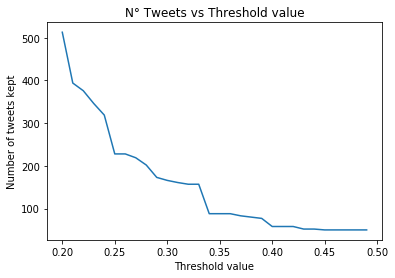

In [97]:
counters = list()
threshold = 0.2
all_key_words = most_common_politics + most_common_health + most_common_war + most_common_climate
all_key_words = list(set(all_key_words))
all_key_words.pop(all_key_words.index('face'))
all_key_words.pop(all_key_words.index('trump'))
all_key_words.pop(all_key_words.index('donald'))


threshold_2 = 0.3
thresholds = np.arange(0.2,0.5,1/100)

numbers = list()
for j in thresholds:
    non_found = 0
    for i in tweet_df.index:
        counter = 0
        text = tweet_df.loc[i,'Tweets']
        text = create_corpus(text)
        for k in all_key_words:
            if k in text:
                counter += 1

        if (counter/len(text)) < j:

            non_found += 1

            #print(i, '|',tweet_df.loc[i,'Tweets'])
            #print('-')
        #print(i,'|',round(counter*100/len(text),2),'%')

        #print(i,round(100*counter/len(text),2),'%', '|',tweet_df.loc[i,'Tweets'])
        #print('-')
    numbers.append(len(tweet_df)- non_found)
plt.plot(thresholds,numbers)
plt.xlabel('Threshold value')
plt.ylabel('Number of tweets kept')
plt.title('N° Tweets vs Threshold value')
plt.show()

### Choose a specific number of words

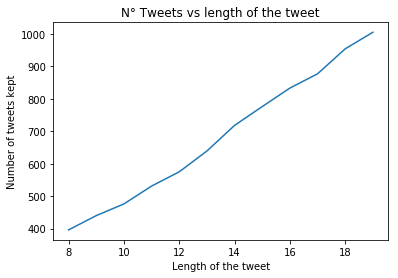

In [102]:
numbers = list()
threshold_optimal = 0.25
lengths = np.arange(8,20,1)

for j in lengths:
    non_found_v2 = 0
    non_found = 0
    for i in tweet_df.index:
        counter = 0
        text = tweet_df.loc[i,'Tweets']
        if len(text.split(' '))< j:
            non_found_v2 += 1
        else:
            text = create_corpus(text)
            for k in all_key_words:
                if k in text:
                    counter += 1

            if (counter/len(text)) < threshold_optimal:

                non_found += 1

                #print(i, '|',tweet_df.loc[i,'Tweets'])
                #print('-')
            #print(i,'|',round(counter*100/len(text),2),'%')

        #print(i,round(100*counter/len(text),2),'%', '|',tweet_df.loc[i,'Tweets'])
        #print('-')
    numbers.append(len(tweet_df)- non_found)
plt.plot(lengths,numbers)
plt.xlabel('Length of the tweet')
plt.ylabel('Number of tweets kept')
plt.title('N° Tweets vs length of the tweet')
plt.show()

In [108]:
threshold = 0.25
tweets_threshold_25 = list()
non_found = 0
for i in tweet_df.index:
    counter = 0
    text = tweet_df.loc[i,'Tweets']
    if len(text.split(' '))< 15:
        pass
    else:
        text = create_corpus(text)
        for k in all_key_words:
            if k in text:
                counter += 1

        if (counter/len(text)) < threshold:

            non_found += 1
        else:
            
            print(i,round(100*counter/len(text),2),'%', '|',tweet_df.loc[i,'Tweets'])
            print('-')
            tweets_threshold_25.append(tweet_df.loc[i,'Tweets'])



32 28.57 % | @PARROTVOTTI @ABridgen @FlyverticalHalo Sorry I mean that this is what the leave campaign and official government info said the leave vote would be. So why did people think this isn’t what was voted for?
-
76 29.41 % | @amikegreen2 @iSee_PW I don't see your point. "If 100% of Republicans aligned themselves with Democrats they would create a sea change in power." True, but they won't. White women and white people are not a monolith.
-
112 42.86 % | @HybridDoktor @realDonaldTrump But that would mean doing what is normal and expected. For Trump to pick up the phone and talk politely and without threat to Allies of the United States.
-
118 33.33 % | The office has been without a Senate-confirmed head since the end of the Obama administration. https://t.co/VjAkyRYLvf
-
130 26.32 % | Drop the dead weight in the Republican party.  Nothing can get done, even when Republicans are in power.  Republicans THROW their power away ! Where's healthcare? Where's the wall? You had the power

1203 28.57 % | @WhiteHouse @FLOTUS @LibertyU Most of the student body at Liberty U are addicted to some sort of drug...
-
1208 37.5 % | @teratodentata @Bich58927225 I’ve had to make heart wrenching but responsible decisions like this before, I feel u
-
1235 25.0 % | On International Women Human Rights Defenders Day show your support for #Saudi activist #IsraaAlGhomgham who sits behind bars &amp; may be sentenced to death for no crime but taking a stand for human rights #WHRDDay 

Sign here 👉🏼 https://t.co/9PDLAcPE06 

@HannaBokhari_ @CdnChange
-
1280 31.25 % | Village Sooram uc Chelhar  Taluka Mithi .Drought Emergency vaccine and Treatment Mobile Unit #01 https://t.co/8W6xvdLQli
-
1295 27.78 % | @LesleyAnnBrandt That's really awful. The color of skin shouldn't be an issue in 2018, especially in medical terms. 
The death of this mother were preventable in so many ways. Unbelivable that no nurse checked on her for so many hours.
-
1352 26.32 % | @cyberagbero Interesting to read your thou

2081 25.0 % | @TasMelas Hawks shot 11/40 from 3...           

In the first quarter
-
2090 40.0 % | @MakingStarWars Is that a TIE Fighter cockpit or are you just happy to see me?
-


In [110]:
print(len(tweets_threshold_25))
tweets_df_25 = pd.DataFrame({'Tweets':tweets_threshold_25})
tweets_df_25.to_csv('Tweets with opt threhsold.csv',index = False)

98
